<a href="https://colab.research.google.com/github/markzaldivar/MAT422/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


## 1.3.1 QR Decomposition
QR decomposition is a useful technique to solve the linear least squares problem. We begin by using the Gram-Schmidt process to form an orthonormal basis from a linearly independent set of $\text{span}(a_1, \dots, a_m)$. Let $A$ and $Q$ be  $n×m$ matrices such that


$$
A = \begin{pmatrix} a_1 & \dots & a_m \end{pmatrix}
$$

and

$$
Q = \begin{pmatrix} q_1 & \dots & q_m \end{pmatrix}
$$

We can then write
$$A=QR$$

Where $R$ is an $m×m$ upper traingular matrix. Column $i$ of this matrix contains the coefficients of the linear combination of $q_j$'s that produces $a_i$.

Below, we use a built-in Python function to find the QR decomposition of a matrix.



In [ ]:
import numpy as np

A = np.array([[5,3],[2,1]])
q,r = np.linalg.qr(A)

print('A:\n', A)
print('Q:\n', q)
print('R: \n', r)




A:
 [[5 3]
 [2 1]]
Q:
 [[-0.92847669 -0.37139068]
 [-0.37139068  0.92847669]]
R: 
 [[-5.38516481 -3.15682075]
 [ 0.         -0.18569534]]


## 1.3.2 Least-Squares Problem
Consider an overdetermined system
$$Ax = b$$
Because such systems are often inconsistent, we aim to approximate a solution. We accomplish this by finding the vector $x$ that minimizes the quantity
$$
\|Ax - b\|
$$
This is called the least-squares problem, and its solution is given by the normal equation:
$$
A^T A x = A^T b
$$
Below, we implement a solution to the least-squares problem in Python utilizing the normal equation.

In [ ]:


def least_squares(A, b):

    # Compute A^T A
    AtA = np.dot(A.T, A)

    # Compute A^T b
    Atb = np.dot(A.T, b)

    # Solve the normal equation (A^T A) x = A^T b
    x = np.linalg.solve(AtA, Atb)

    return x


A = np.array([[2, 1], [1, 3], [3, 1]])
b = np.array([5, 6, 7])

x = least_squares(A, b)
print('A:\n',A)
print('b:\n',b)
print("\nLeast squares solution:", x)


A:
 [[2 1]
 [1 3]
 [3 1]]
b:
 [5 6 7]

Least squares solution: [1.85555556 1.37777778]


## 1.3.3 Linear Regression
Given input data points $\left\{\left(\mathbf{x}_{i}, y_{i}\right)\right\}_{i=1}^{n}$ with each $\mathbf{x}_{i}=\left(x_{i 1}, \dots, x_{i d}\right)^{T}$, we seek an affine function to fit the data. The common approach involves finding coefficients $\beta_{j}$ 's that minimize the criterion
$$
\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
where
$$
\hat{y}_{i}=\beta_{0}+\sum_{j=1}^{d} \beta_{j} x_{i j}
$$
can be viewed as the predicted values of the linear model with coefficients $\beta_{j} .$ The minimization problem can be formulated in matrix form. Let
$$
\mathbf{y}=\left(\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{array}\right), \quad A=\left(\begin{array}{cc}
1 & \mathbf{x}_{1}^{T} \\
1 & \mathbf{x}_{2}^{T} \\
\vdots & \vdots \\
1 & \mathbf{x}_{n}^{T}
\end{array}\right) \quad \text { and } \quad \beta=\left(\begin{array}{c}
\beta_{0} \\
\beta_{1} \\
\vdots \\
\beta_{d}
\end{array}\right)
$$
Then the problem is transformed to
$$
\min _{\beta}\|\mathbf{y}-A \beta\|^{2}
$$
This is simply the least-squares problem discussed above.

In addition to the manual solution using the normal equation seen in the previous section, we can also use the higher-level API for linear regression provided by the scikit-learn library in Python. This is implemented below to solve the least-squares problem.

In [ ]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt


X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.5, 3.6, 5.8, 8.2, 10.4])


model = LinearRegression()


model.fit(X, y)


intercept = model.intercept_
slope = model.coef_

model_line = X*slope + intercept

print("Intercept:", intercept)
print("Slope:", slope)


X_new = np.array([[6], [7], [8]])
y_pred = model.predict(X_new)
print("Predictions:", y_pred)



Intercept: -0.8200000000000003
Slope: [2.24]
Predictions: [12.62 14.86 17.1 ]


Using the model, we can make accurate predictions on the data. Below is the model plotted against the raw data.

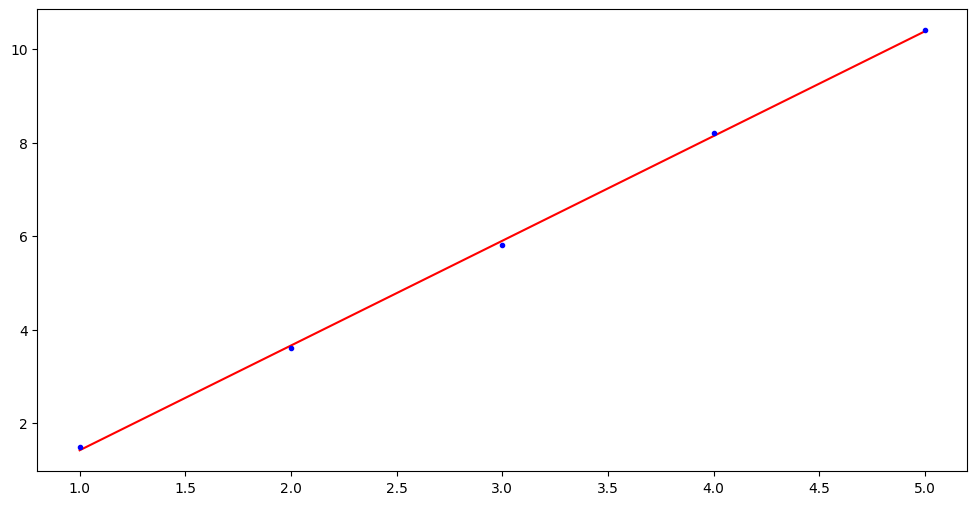

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(X, model_line, 'r')     # regression line
plt.plot(X, y, 'b.')   # scatter plot showing actual data

plt.show()
